In [42]:
#Data loading and data refinement
from IPython.display import Image

import numpy as np
import matplotlib.pyplot as plt
import scipy 
from scipy import signal
from scipy import interpolate

In [43]:
data = np.loadtxt('calcite.txt')

data=np.array(data)

from operator import itemgetter
first_item = itemgetter(0)
data = np.array(sorted(data, key = first_item))


In [44]:
#Load data and refine data using 1d spline interpolation

xvals=[]

yvals=[]

for i in range(0,data.shape[0]):
    xvals.append(data[i][0])
   
    
for i in range(0,data.shape[0]):
    yvals.append(data[i][1])

    
s = scipy.interpolate.interp1d(xvals, yvals)

xvals_fine=np.arange(min(xvals),max(xvals),0.5)
yvals_fine=[]

for x in np.arange(min(xvals),max(xvals),0.5):
    yvals_fine.append(s(x))

    

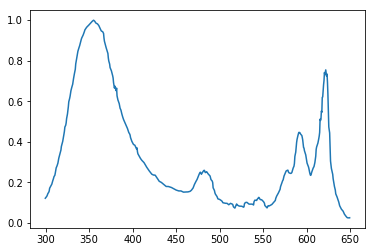

In [45]:
#Compute all maxima of signal
plt.plot(xvals_fine,yvals_fine)

peaks=scipy.signal.find_peaks(yvals_fine)
peaks=np.array(peaks)

intensities=[]

wavelengths = [] 

for i in range(0,peaks[0].shape[0]):
    wavelengths.append(xvals_fine[peaks[0][i]])

for i in range(0,peaks[0].shape[0]):
    intensities.append(yvals_fine[peaks[0][i]])


In [46]:
#Effective mass calculations assuming this is the lowest excited state

In [101]:
import skimage
from skimage import io

#Parameters
h= 4.1357*10e-15
R_eff=2.8e-6
c=2.99792458e+17
alpha_01=2.4048

#Alpha_01 is the first root of the 0-th order spherical bessel function

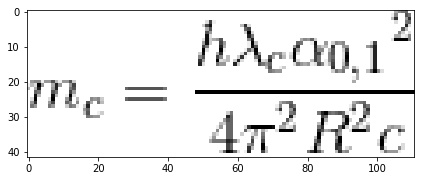

In [102]:
img=io.imread('CodeCogsEqn.gif')
io.imshow(img)

#effective mass of electron in band c, where c is determined from the band structure
def effective_mass(lambda_c):
    m_c=(h*lambda_c*(alpha_01**2))/(4*(np.pi)**2*(R_eff**2))
    return m_c

In [103]:
effective_masses=[effective_mass(lambda_c) for lambda_c in wavelengths]

In [104]:
effective_masses

[0.2743545136346093,
 0.2932865460477196,
 0.2948320180814428,
 0.3129913144776916,
 0.36940104370859167,
 0.37249198777603826,
 0.3748101958266232,
 0.3960604362903185,
 0.40146958840834995,
 0.41035605260225894,
 0.4180834127708754,
 0.4211743568383219,
 0.42967445302380003,
 0.44706101340318705,
 0.4571065816223885,
 0.47565224602706796,
 0.4768113500523604,
 0.47951592611137617,
 0.4806750301366686,
 0.4818341341619611]

Text(0,0.5,'Maxima Intensities')

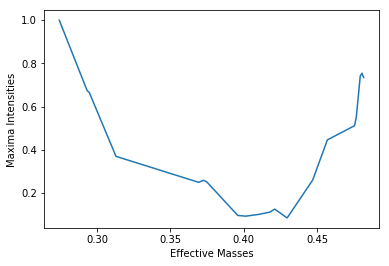

In [105]:
#Intensity at maxima vs effective mass at maxima
plt.plot(effective_masses,intensities)
plt.xlabel('Effective Masses')
plt.ylabel('Maxima Intensities')

In [106]:
#Connection with scattering experiments. Compton Scattering. What wavelengths of radiation do we measure in sample if we 
#irradiate with wavelength lambda_i ?

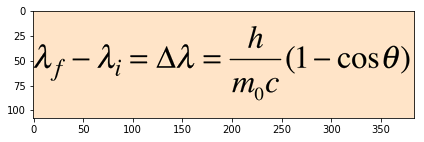

In [107]:
eqtn=io.imread('img.png')
io.imshow(eqtn)

In [118]:
#Parameters
#lambda_i is incident wavelength in nanometer


cos_theta=0.5
lambda_i=450

lambda_f=[]

for i in range(0,len(effective_masses)):
    lambda_f.append(lambda_i+(1240/effective_masses[i])*(1-cos_theta))


In [119]:
lambda_f

[2709.849826366364,
 2563.973546877674,
 2552.8923657427686,
 2430.885639062008,
 2128.392659034005,
 2114.4653317288976,
 2104.1705826134857,
 2015.4176564748575,
 1994.3261903299497,
 1960.88303941977,
 1932.9576612258045,
 1922.0744269765746,
 1892.9529045462186,
 1836.8353119864782,
 1806.3576306415475,
 1753.473294152631,
 1750.3046171864733,
 1742.9706110657812,
 1739.8527302816574,
 1736.7498502951569]